## Let us Import the required Libraries

In [1]:
import numpy as  np
import pandas as  pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Loading the Dataset

In [2]:
app_data=pd.read_csv( 'application_data.csv' )


In [3]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01880,-9461,-637,-3648.00000,-2120,NaN,1,1,0,1,1,0,Laborers,1.00000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08304,0.26295,0.13938,0.02470,0.03690,0.97220,0.61920,0.01430,0.00000,...,0.02500,0.03690,0.97220,0.62430,0.01440,0.00000,0.06900,0.08330,0.12500,0.03750,0.02050,0.01930,0.00000,0.00000,reg oper account,block of flats,0.01490,"Stone, brick",No,2.00000,2.00000,2.00000,2.00000,-1134.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
1,100003,0,Cash loans,F,N,N,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,0.00354,-16765,-1188,-1186.00000,-291,NaN,1,1,0,1,1,0,Core staff,2.00000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31127,0.62225,NaN,0.09590,0.05290,0.98510,0.79600,0.06050,0.08000,...,0.09680,0.05290,0.98510,0.79870,0.06080,0.08000,0.03450,0.29170,0.33330,0.01320,0.07870,0.05580,0.00390,0.01000,reg oper account,block of flats,0.07140,Block,No,1.00000,0.00000,1.00000,0.00000,-828.00000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
2,100004,0,Revolving loans,M,Y,Y,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01003,-19046,-225,-4260.00000,-2531,26.00000,1,1,1,1,1,0,Laborers,1.00000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.55591,0.72957,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.00000,0.00000,0.00000,-815.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
3,100006,0,Cash loans,F,N,Y,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.00802,-19005,-3039,-9833.00000,-2437,NaN,1,1,0,1,0,0,Laborers,2.00000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.65044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Na

## Data Inspection

In [4]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_data.shape

(307511, 122)

In [6]:
app_data.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

## Calculating Missing Value Percentage

In [7]:
null_percent=(app_data.isna().mean())*100
print(null_percent)


SK_ID_CURR                    0.00000
TARGET                        0.00000
NAME_CONTRACT_TYPE            0.00000
CODE_GENDER                   0.00000
FLAG_OWN_CAR                  0.00000
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY    13.50163
AMT_REQ_CREDIT_BUREAU_WEEK   13.50163
AMT_REQ_CREDIT_BUREAU_MON    13.50163
AMT_REQ_CREDIT_BUREAU_QRT    13.50163
AMT_REQ_CREDIT_BUREAU_YEAR   13.50163
Length: 122, dtype: float64


In [8]:
# creating temp data frame to filter out the the missing percentage
temp=null_percent.reset_index().rename(columns={"index":"Column",0:"Missing_percentage"}).sort_values(by="Missing_percentage",ascending=False)

In [9]:
temp

,Column,Missing_percentage
76,COMMONAREA_MEDI,69.87230
48,COMMONAREA_AVG,69.87230
62,COMMONAREA_MODE,69.87230
70,NONLIVINGAPARTMENTS_MODE,69.43296
56,NONLIVINGAPARTMENTS_AVG,69.43296
...,...,...
15,NAME_HOUSING_TYPE,0.00000
14,NAME_FAMILY_STATUS,0.00000
13,NAME_EDUCATION_TYPE,0.00000
12,NAME_INCOME_TYPE,0.00000


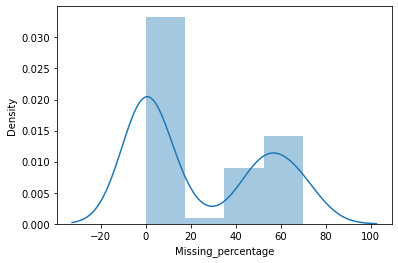

In [10]:
sns.distplot(temp['Missing_percentage'])
plt.show()

### we can see two peaks in this graph 
#### 1.fist peak shows that most of the missing value percentage is between 0% to 16% 
##### 2.second peak shows  that second most missing value are in between 50%  to 75%

In [11]:
# making a list of  the columns those who have missing percentage grater then 45
drop_cols=list(temp[temp["Missing_percentage"]>45]["Column"])

In [12]:
drop_cols

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'FLOORSMIN_MEDI',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'YEARS_BUILD_AVG',
 'OWN_CAR_AGE',
 'LANDAREA_MEDI',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'ELEVATORS_MODE',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'APARTMENTS_MODE',
 'ENTRANCES_MEDI',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'LIVINGAREA_MEDI',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATIO

In [13]:
# droping the columns who have missing percentage grater then 45
app_data.drop(drop_cols,axis=1,inplace=True)

# Missing Value Imputation

In [14]:
# making a list of  the columns those who have missing percentage less then 13
imput_cols=list(temp[(temp["Missing_percentage"]>0) & (temp["Missing_percentage"]<13) ]["Column"])

In [15]:
imput_cols

['NAME_TYPE_SUITE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'EXT_SOURCE_2',
 'AMT_GOODS_PRICE',
 'AMT_ANNUITY',
 'CNT_FAM_MEMBERS',
 'DAYS_LAST_PHONE_CHANGE']

In [16]:
# Target: NAME_TYPE_SUITE
# OBjective: to impute the missing value of those Who was accompanying client when he was applying for the loan

In [17]:

app_data.NAME_TYPE_SUITE

0         Unaccompanied
1                Family
2         Unaccompanied
3         Unaccompanied
4         Unaccompanied
              ...      
307506    Unaccompanied
307507    Unaccompanied
307508    Unaccompanied
307509    Unaccompanied
307510    Unaccompanied
Name: NAME_TYPE_SUITE, Length: 307511, dtype: object

In [18]:
# using value count to check the category count
app_data.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [19]:
# most frequent category in the column
app_data.NAME_TYPE_SUITE.mode()

0    Unaccompanied
dtype: object

In [20]:
#using fillna command imputing missing value
app_data.NAME_TYPE_SUITE.fillna(app_data.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [21]:
# Target: AMT_GOODS_PRICE
# OBjective: to impute the missing value 

In [22]:
app_data.AMT_GOODS_PRICE

0         351000.00000
1        1129500.00000
2         135000.00000
3         297000.00000
4         513000.00000
              ...     
307506    225000.00000
307507    225000.00000
307508    585000.00000
307509    319500.00000
307510    675000.00000
Name: AMT_GOODS_PRICE, Length: 307511, dtype: float64

In [23]:
app_data.AMT_GOODS_PRICE.describe()

count    307233.00000
mean     538396.20743
std      369446.46054
min       40500.00000
25%      238500.00000
50%      450000.00000
75%      679500.00000
max     4050000.00000
Name: AMT_GOODS_PRICE, dtype: float64

<AxesSubplot:>

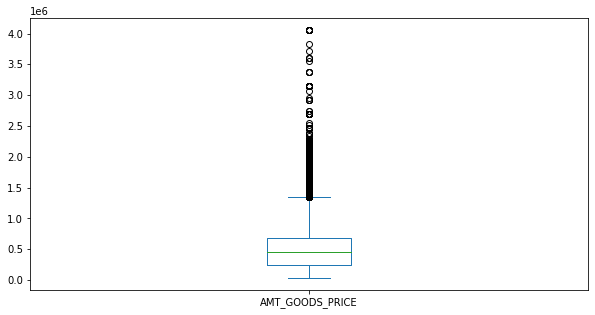

In [24]:
plt.figure(figsize=[10,5])
app_data.AMT_GOODS_PRICE.plot.box()

In [25]:
# outlier is there in AMT_GOODS_PRICE so median is the best option in this case to impute the missing values 
# beacuse median is not affected by ouliers 
app_data.AMT_GOODS_PRICE.median()

450000.0

In [26]:
app_data.AMT_GOODS_PRICE.fillna(app_data.AMT_GOODS_PRICE.median(),inplace=True)

In [27]:
# Target: AMT_ANNUITY
# OBjective: to impute the missing value 

In [28]:
app_data.AMT_ANNUITY

0        24700.50000
1        35698.50000
2         6750.00000
3        29686.50000
4        21865.50000
             ...    
307506   27558.00000
307507   12001.50000
307508   29979.00000
307509   20205.00000
307510   49117.50000
Name: AMT_ANNUITY, Length: 307511, dtype: float64

<AxesSubplot:xlabel='AMT_ANNUITY'>

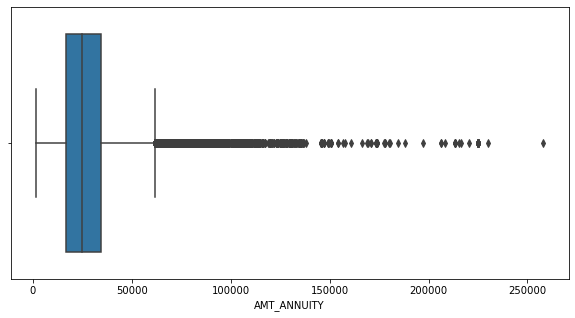

In [29]:
plt.figure(figsize=[10,5])
sns.boxplot(app_data.AMT_ANNUITY)

In [30]:
#outlier is there in AMT_ANNUITY so median is the best option in this case to impute the miossing values
app_data.AMT_ANNUITY.median()

24903.0

In [31]:
app_data.AMT_ANNUITY.fillna(app_data.AMT_ANNUITY.median(),inplace=True)

In [32]:
# Target: CNT_FAM_MEMBERS
# OBjective: to impute the missing value 
app_data.CNT_FAM_MEMBERS.value_counts()

2.00000     158357
1.00000      67847
3.00000      52601
4.00000      24697
5.00000       3478
6.00000        408
7.00000         81
8.00000         20
9.00000          6
10.00000         3
14.00000         2
12.00000         2
20.00000         2
16.00000         2
13.00000         1
15.00000         1
11.00000         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [33]:
app_data.CNT_FAM_MEMBERS.mode()

0   2.00000
dtype: float64

In [34]:
app_data.CNT_FAM_MEMBERS.fillna(app_data.CNT_FAM_MEMBERS.mode()[0],inplace=True)

<AxesSubplot:>

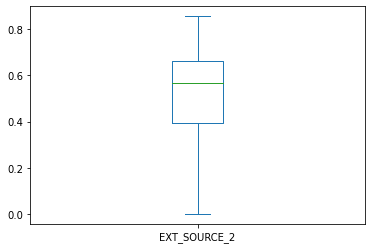

In [35]:
# Target: EXT_SOURCE_2
# OBjective: to impute the missing value 
app_data["EXT_SOURCE_2"].plot.box()

In [36]:
#no ouliers are in the boxplot so we can impute the mean value
app_data["EXT_SOURCE_2"].mean()

0.5143926741308463

In [37]:
app_data["EXT_SOURCE_2"].fillna(app_data["EXT_SOURCE_2"].mean(),inplace=True)

In [38]:
# making a list of the columns those are less important for the analysis
lessimp_cols=list(temp[(temp["Missing_percentage"]>13) & (temp["Missing_percentage"]<30) ]["Column"])

In [39]:
for i in app_data:
    if i.startswith("FLAG") or i.endswith("MEDI") or i.endswith("MODE") or i.endswith("AVG") or i.startswith("REG") or i.endswith("GION") or  i.endswith("CIRCLE"):
        lessimp_cols.append(i)
        

In [40]:
lessimp_cols

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',

In [41]:
# droping those less important columns 
app_data.drop(lessimp_cols,axis=1,inplace=True)

In [42]:
app_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,-3648.00000,-2120,Laborers,1.00000,WEDNESDAY,10,0,Business Entity Type 3,0.26295,-1134.00000
1,100003,0,Cash loans,F,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,-16765,-1188,-1186.00000,-291,Core staff,2.00000,MONDAY,11,0,School,0.62225,-828.00000
2,100004,0,Revolving loans,M,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,-4260.00000,-2531,Laborers,1.00000,MONDAY,9,0,Government,0.55591,-815.00000
3,100006,0,Cash loans,F,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,-9833.00000,-2437,Laborers,2.00000,WEDNESDAY,17,0,Business Entity Type 3,0.65044,-617.00000
4,100007,0,Cash loans,M,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,-4311.00000,-3458,Core staff,1.00000,THURSDAY,11,1,Religion,0.32274,-1106.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.00000,254700.00000,27558.00000,225000.00000,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,-9327,-236,-8456.00000,-1982,Sales staff,1.00000,THURSDAY,15,0,Services,0.68163,-273.00000
307507,456252,0,Cash loans,F,0,72000.00000,269550.00000,12001.50000,225000.00000,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,-20775,365243,-4388.00000,-4090,NaN,1.00000,MONDAY,8,0,XNA,0.11599,0.00000
307508,456253,0,Cash loans,F,0,153000.00000,677664.00000,29979.00000,585000.00000,Unaccompanied,Working,Higher education,Separated,House / apartment,-14966,-7921,-6737.00000,-5150,Managers,1.00000,THURSDAY,9,1,School,0.53572,-1909.00000
307509,456254,1,Cash loans,F,0,171000.00000,370107.00000,20205.00000,319500.00000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,-11961,-4786,-2562.00000,-931,Laborers,2.00000,WEDNESDAY,9,0,Business Entity Type 1,0.51416,-322.00000


### corecting the coulmns 

In [43]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE
count,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307511.00000,307510.00000
mean,278180.51858,0.08073,0.41705,168797.91930,599025.99971,27108.48784,538316.29437,-16036.99507,63815.04590,-4986.12033,-2994.20237,2.15266,12.06342,0.17955,0.51439,-962.85879
std,102790.17535,0.27242,0.72212,237123.14628,402490.77700,14493.46107,369288.98225,4363.98863,141275.76652,3522.88632,1509.45042,0.91068,3.26583,0.38382,0.19086,826.80849
min,100002.00000,0.00000,0.00000,25650.00000,45000.00000,1615.50000,40500.00000,-25229.00000,-17912.00000,-24672.00000,-7197.00000,1.00000,0.00000,0.00000,0.00000,-4292.00000
25%,189145.50000,0.00000,0.00000,112500.00000,270000.00000,16524.00000,238500.00000,-19682.00000,-2760.00000,-7479.50000,-4299.00000,2.00000,10.00000,0.00000,0.39297,-1570.00000
50%,278202.00000,0.00000,0.00000,147150.00000,513531.00000,24903.00000,450000.00000,-15750.00000,-1213.00000,-4504.00000,-3254.00000,2.00000,12.00000,0.00000,0.56547,-757.00000
75%,367142.50000,0.00000,1.00000,202500.00000,808650.00000,34596.00000,679500.00000,-12413.00000,-289.00000,-2010.00000,-1720.00000,3.00000,14.00000,0.00000,0.66342,-274.00000
max,456255.00000,1.00000,19.00000,117000000.00000,4050000.00000,258025.50000,4050000.00000,-7489.00000,365243.00000,0.00000,0.00000,20.00000,23.00000,1.00000,0.85500,0.00000


### we can see some columns those starting with days have negative values

In [44]:
neg_col=[x for x in app_data if x.startswith("DAYS")]

In [45]:
neg_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [46]:
app_data[neg_col]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,-9461,-637,-3648.00000,-2120,-1134.00000
1,-16765,-1188,-1186.00000,-291,-828.00000
2,-19046,-225,-4260.00000,-2531,-815.00000
3,-19005,-3039,-9833.00000,-2437,-617.00000
4,-19932,-3038,-4311.00000,-3458,-1106.00000
...,...,...,...,...,...
307506,-9327,-236,-8456.00000,-1982,-273.00000
307507,-20775,365243,-4388.00000,-4090,0.00000
307508,-14966,-7921,-6737.00000,-5150,-1909.00000
307509,-11961,-4786,-2562.00000,-931,-322.00000


In [47]:
# we found some columns containg negative values and we convert using abs into positive
app_data[neg_col]=abs(app_data[neg_col])

In [48]:
app_data[neg_col]

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
0,9461,637,3648.00000,2120,1134.00000
1,16765,1188,1186.00000,291,828.00000
2,19046,225,4260.00000,2531,815.00000
3,19005,3039,9833.00000,2437,617.00000
4,19932,3038,4311.00000,3458,1106.00000
...,...,...,...,...,...
307506,9327,236,8456.00000,1982,273.00000
307507,20775,365243,4388.00000,4090,0.00000
307508,14966,7921,6737.00000,5150,1909.00000
307509,11961,4786,2562.00000,931,322.00000


In [49]:
app_data.CODE_GENDER.value_counts() # counting the code gender coloumn

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [50]:
app_data.CODE_GENDER.replace(to_replace="XNA",
    value="F",inplace=True)    # replacing the XNA with the majority which is F

In [51]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [52]:
app_data.ORGANIZATION_TYPE.replace("XNA",np.nan,inplace=True)   # replacing the XNA with np.nan in the oragnization type

In [53]:
app_data.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

## creating binning

In [54]:
app_data.AMT_INCOME_TOTAL.head()

0   202500.00000
1   270000.00000
2    67500.00000
3   135000.00000
4   121500.00000
Name: AMT_INCOME_TOTAL, dtype: float64

In [55]:
app_data["AMT_INCOME_category"]=pd.qcut(app_data.AMT_INCOME_TOTAL,q=[0, 0.25, .5, .75, .85, 1],labels=["very_low","low","medium","high","very_high"])

In [56]:
app_data.AMT_INCOME_category

0            medium
1         very_high
2          very_low
3               low
4               low
            ...    
307506       medium
307507     very_low
307508       medium
307509       medium
307510       medium
Name: AMT_INCOME_category, Length: 307511, dtype: category
Categories (5, object): ['very_low' < 'low' < 'medium' < 'high' < 'very_high']

<AxesSubplot:>

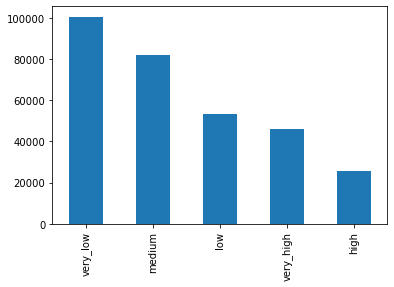

In [57]:
app_data["AMT_INCOME_category"].value_counts().plot.bar()

In [58]:
app_data["AMT_CREDIT_category"]=pd.qcut(app_data.AMT_CREDIT,q=[0, 0.25, .5, .75, .85, 1],labels=["very_low","low","medium","high","very_high"])

In [59]:
app_data.AMT_CREDIT_category

0               low
1         very_high
2          very_low
3               low
4               low
            ...    
307506     very_low
307507     very_low
307508       medium
307509          low
307510       medium
Name: AMT_CREDIT_category, Length: 307511, dtype: category
Categories (5, object): ['very_low' < 'low' < 'medium' < 'high' < 'very_high']

<AxesSubplot:>

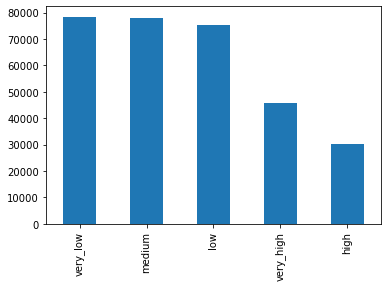

In [60]:
app_data["AMT_CREDIT_category"].value_counts().plot.bar()

In [61]:
# create an age column from the DAYS_BIRTH
app_data["Age"]=(app_data["DAYS_BIRTH"]/365).astype(int)

In [62]:
# create an age range from the Age
app_data["Age_category"]=pd.cut(app_data["Age"],bins=[19,25,35,55,80],labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])

In [63]:
app_data["Age_category"].value_counts()

Middle_Age        153178
Young              75925
Senior_Citizen     62090
Very_Young         16318
Name: Age_category, dtype: int64

<AxesSubplot:>

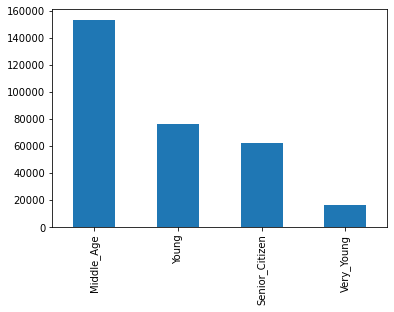

In [64]:
app_data["Age_category"].value_counts().plot.bar()

## ANALYSIS



### Target : AMT_INCOME_TOTAL
### OBjective: draw boxplot to find outliers

In [65]:
app_data["AMT_INCOME_TOTAL"].describe()

count      307511.00000
mean       168797.91930
std        237123.14628
min         25650.00000
25%        112500.00000
50%        147150.00000
75%        202500.00000
max     117000000.00000
Name: AMT_INCOME_TOTAL, dtype: float64

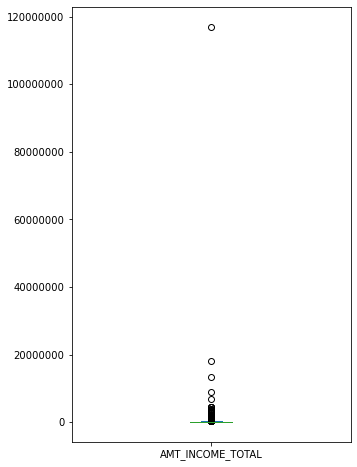

In [66]:
plt.figure(figsize=[5,8])
app_data["AMT_INCOME_TOTAL"].plot.box()
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

------so we found in AMT_INCOME_TOTAL column there is a oulier which can easly be seen (117000000) which is cant be the income        of a person

### Target : AMT_ANNUITY
### OBjective: draw boxplot to find outliers

In [67]:
app_data["AMT_ANNUITY"].describe()

count   307511.00000
mean     27108.48784
std      14493.46107
min       1615.50000
25%      16524.00000
50%      24903.00000
75%      34596.00000
max     258025.50000
Name: AMT_ANNUITY, dtype: float64

<AxesSubplot:>

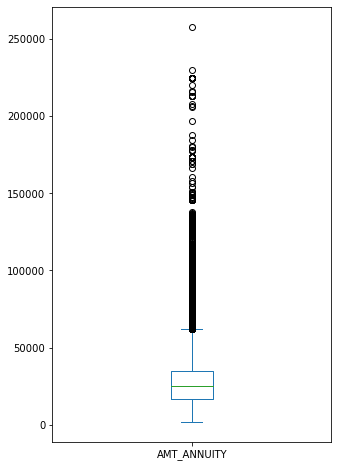

In [68]:
plt.figure(figsize=[5,8])
app_data["AMT_ANNUITY"].plot.box()

------so we found inAMT_ANNUITY column there is a oulier which can easly be seen (258025) which is cant be the loan ammunity amount.

### Target : DAYS_REGISTRATION
### OBjective: draw boxplot to find outliers

In [69]:
app_data["DAYS_REGISTRATION"].describe()

count   307511.00000
mean      4986.12033
std       3522.88632
min          0.00000
25%       2010.00000
50%       4504.00000
75%       7479.50000
max      24672.00000
Name: DAYS_REGISTRATION, dtype: float64

<AxesSubplot:>

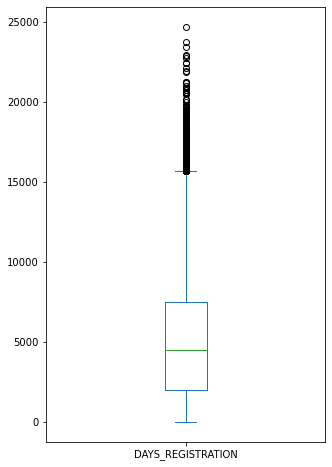

In [70]:
plt.figure(figsize=[5,8])
app_data["DAYS_REGISTRATION"].plot.box()

----- we can clearly see value greater then 20000 are outliers


# Checking Imbalance

In [71]:
app_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

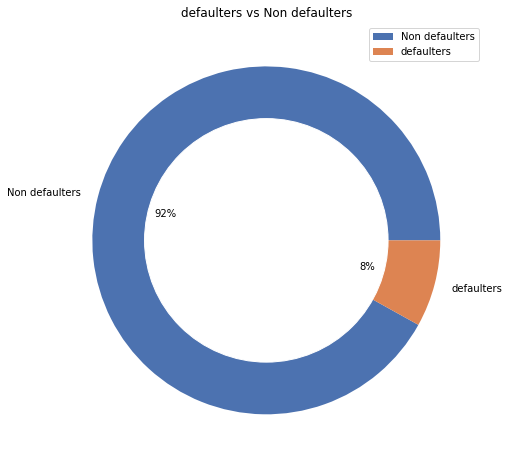

In [72]:
plt.figure(figsize=(12,8))
plt.title('defaulters vs Non defaulters')

#define data
data = app_data['TARGET'].value_counts().values
labels = ["Non defaulters","defaulters"]
#define Seaborn color palette to use
colors = sns.color_palette('deep')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()






#### As we can see the imbalance is high between defaulters (8% ) and non defaulters(92%) the ratio is 0.086

## looking at the distribution side

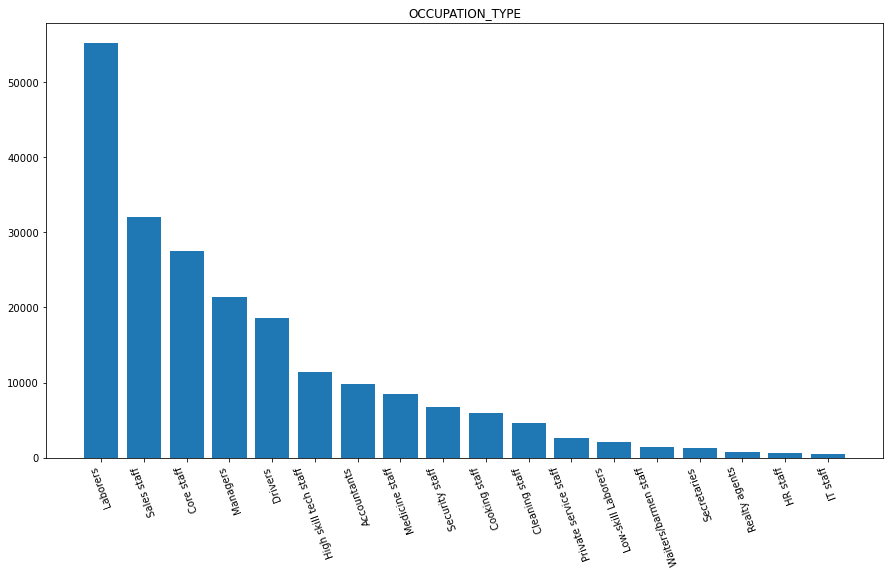

In [73]:
plt.figure(figsize=(15,8))
plt.title('OCCUPATION_TYPE')

#define data
height = app_data['OCCUPATION_TYPE'].value_counts().values
x= app_data['OCCUPATION_TYPE'].value_counts().index
#create bar graph
plt.bar(x=x,height=height)
plt.xticks( rotation=110)
plt.show()


##### we can see the distribution of the occupation type majority are the Laborers

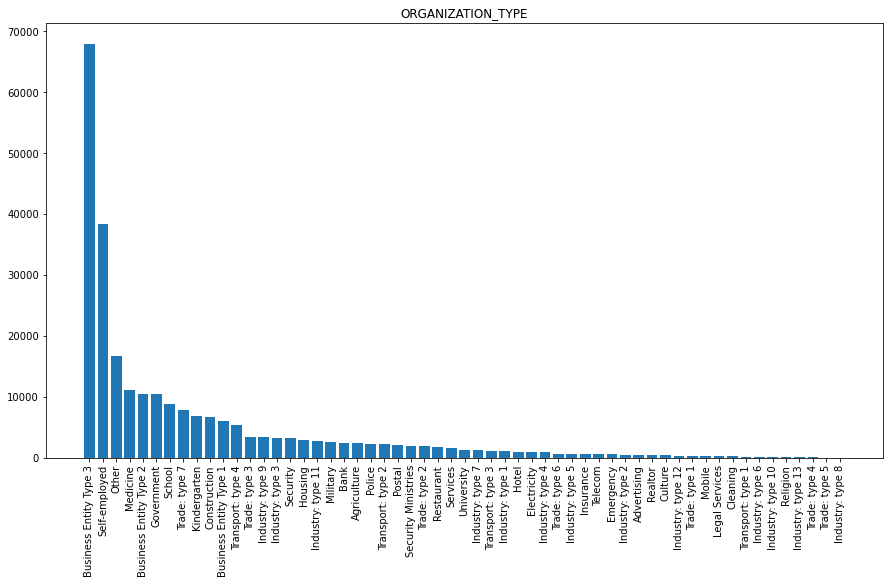

In [74]:
plt.figure(figsize=(15,8))
plt.title('ORGANIZATION_TYPE')

#define data
height = app_data['ORGANIZATION_TYPE'].value_counts().values
x= app_data['ORGANIZATION_TYPE'].value_counts().index
#create bar graph
plt.bar(x=x,height=height)
plt.xticks( rotation=90)

plt.show()

#### we can see the distribution of the Organization type majority are the Business  Entry Type 3

### Non- defaulters client Vs defaulters client ( divide the data frame into two data frame for better analysis)

In [75]:
#1=defaulters and 0=Non-defaulters
app_data['TARGET'].unique()

array([1, 0], dtype=int64)

In [76]:
default= app_data[app_data['TARGET']==1]

In [77]:
non_default= app_data[app_data['TARGET']==0]

In [78]:
# confirmation

In [79]:
default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_category,AMT_CREDIT_category,Age,Age_category
0,100002,1,Cash loans,M,0,202500.00000,406597.50000,24700.50000,351000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,9461,637,3648.00000,2120,Laborers,1.00000,WEDNESDAY,10,0,Business Entity Type 3,0.26295,1134.00000,medium,low,25,Very_Young
26,100031,1,Cash loans,F,0,112500.00000,979992.00000,27076.50000,702000.00000,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,18724,2628,6573.00000,1827,Cooking staff,1.00000,MONDAY,9,0,Business Entity Type 3,0.54848,161.00000,very_low,high,51,Middle_Age
40,100047,1,Cash loans,M,0,202500.00000,1193580.00000,35028.00000,855000.00000,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,17482,1262,1182.00000,1029,Laborers,2.00000,TUESDAY,9,0,Business Entity Type 3,0.30684,1075.00000,medium,very_high,47,Middle_Age
42,100049,1,Cash loans,F,0,135000.00000,288873.00000,16258.50000,238500.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,13384,3597,45.00000,4409,Sales staff,2.00000,THURSDAY,11,0,Self-employed,0.67420,1480.00000,low,low,36,Middle_Age
81,100096,1,Cash loans,F,0,81000.00000,252000.00000,14593.50000,252000.00000,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,24794,365243,5391.00000,4199,NaN,2.00000,THURSDAY,10,0,NaN,0.02395,0.00000,very_low,very_low,67,Senior_Citizen


In [80]:
non_default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_category,AMT_CREDIT_category,Age,Age_category
1,100003,0,Cash loans,F,0,270000.00000,1293502.50000,35698.50000,1129500.00000,Family,State servant,Higher education,Married,House / apartment,16765,1188,1186.00000,291,Core staff,2.00000,MONDAY,11,0,School,0.62225,828.00000,very_high,very_high,45,Middle_Age
2,100004,0,Revolving loans,M,0,67500.00000,135000.00000,6750.00000,135000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19046,225,4260.00000,2531,Laborers,1.00000,MONDAY,9,0,Government,0.55591,815.00000,very_low,very_low,52,Middle_Age
3,100006,0,Cash loans,F,0,135000.00000,312682.50000,29686.50000,297000.00000,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,19005,3039,9833.00000,2437,Laborers,2.00000,WEDNESDAY,17,0,Business Entity Type 3,0.65044,617.00000,low,low,52,Middle_Age
4,100007,0,Cash loans,M,0,121500.00000,513000.00000,21865.50000,513000.00000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,19932,3038,4311.00000,3458,Core staff,1.00000,THURSDAY,11,1,Religion,0.32274,1106.00000,low,low,54,Middle_Age
5,100008,0,Cash loans,M,0,99000.00000,490495.50000,27517.50000,454500.00000,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,16941,1588,4970.00000,477,Laborers,2.00000,WEDNESDAY,16,0,Other,0.35422,2536.00000,very_low,low,46,Middle_Age


### Univariate Analysis (Categorical)
### Target : NAME_CONTRACT_TYPE
### Objective: to understand the loan Type  of defaulters vs Non- defaulters

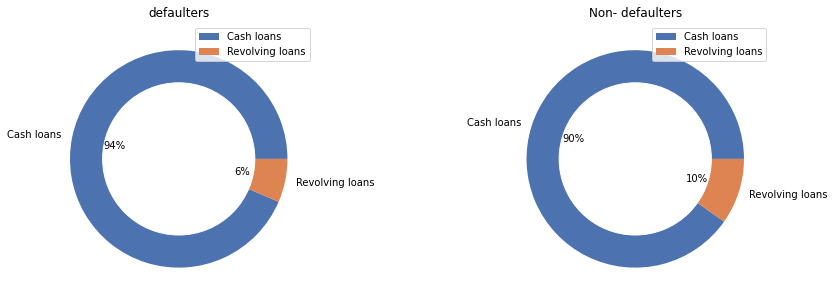

In [81]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('defaulters')

#define data
data = default["NAME_CONTRACT_TYPE"].value_counts().values
labels = default["NAME_CONTRACT_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('deep')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters')
#define data
data = non_default["NAME_CONTRACT_TYPE"].value_counts().values
labels = non_default["NAME_CONTRACT_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('deep')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


#### Observation
      1. In both Defaulters and non Defaulters people prefer cash loans.
      2. But in Defaulters this can be seen that they avoid revolving loans.

### Univariate Analysis (Categorical)
### Target : Gender
### Objective: to understand the geneder distribution in  defaulters vs Non- defaulters

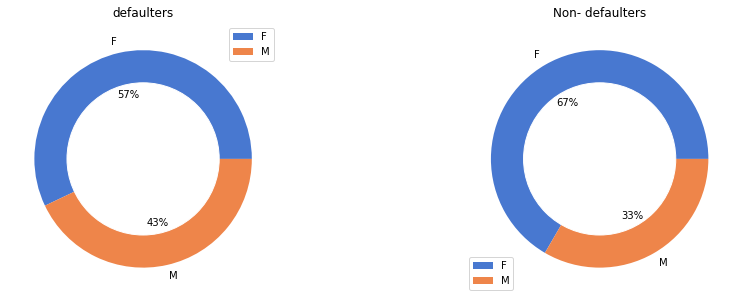

In [82]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('defaulters')

#define data
data = default["CODE_GENDER"].value_counts().values
labels = default["CODE_GENDER"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters')
#define data
data = non_default["CODE_GENDER"].value_counts().values
labels = non_default["CODE_GENDER"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('muted')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


#### Observation
      1. In both Defaulters and non Defaulters percentage of females is on higher side.
      2. But in Defaulters this can be seen that male percentage is also high as compare to non defaulters.

### Univariate Analysis (Categorical)
### Target : Income Source
### Objective: to understand the source of income  in  defaulters vs Non- defaulters

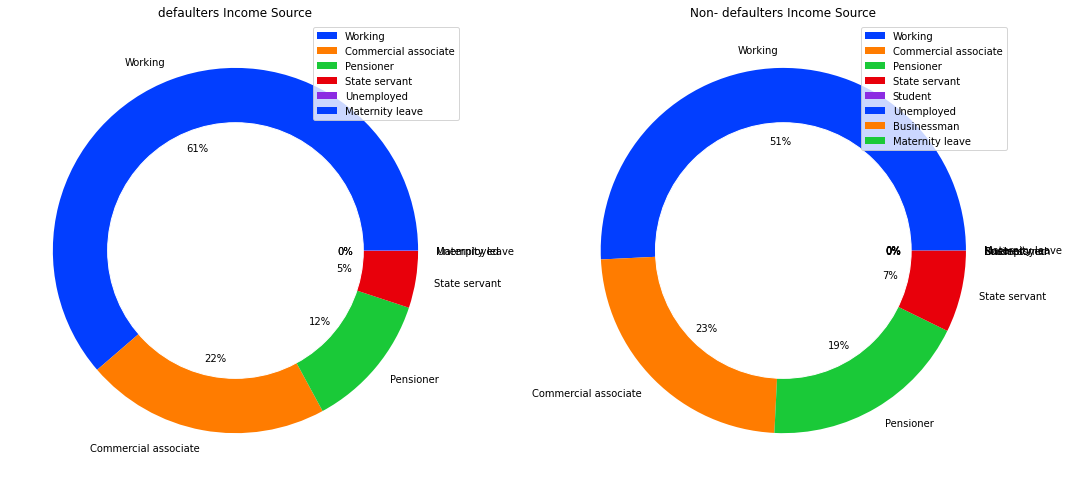

In [83]:
plt.figure(figsize=(18,9))
plt.subplot(1,2,1)
plt.title('defaulters Income Source')

#define data
data = default["NAME_INCOME_TYPE"].value_counts().values
labels = default["NAME_INCOME_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters Income Source')
#define data
data = non_default["NAME_INCOME_TYPE"].value_counts().values
labels = non_default["NAME_INCOME_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()


#### Observation
      1. In both Defaulters and non Defaulters working people are more.
      

### Univariate Analysis (Categorical)
### Target : Education type
### Objective: to understand the Education  in  defaulters vs Non- defaulters

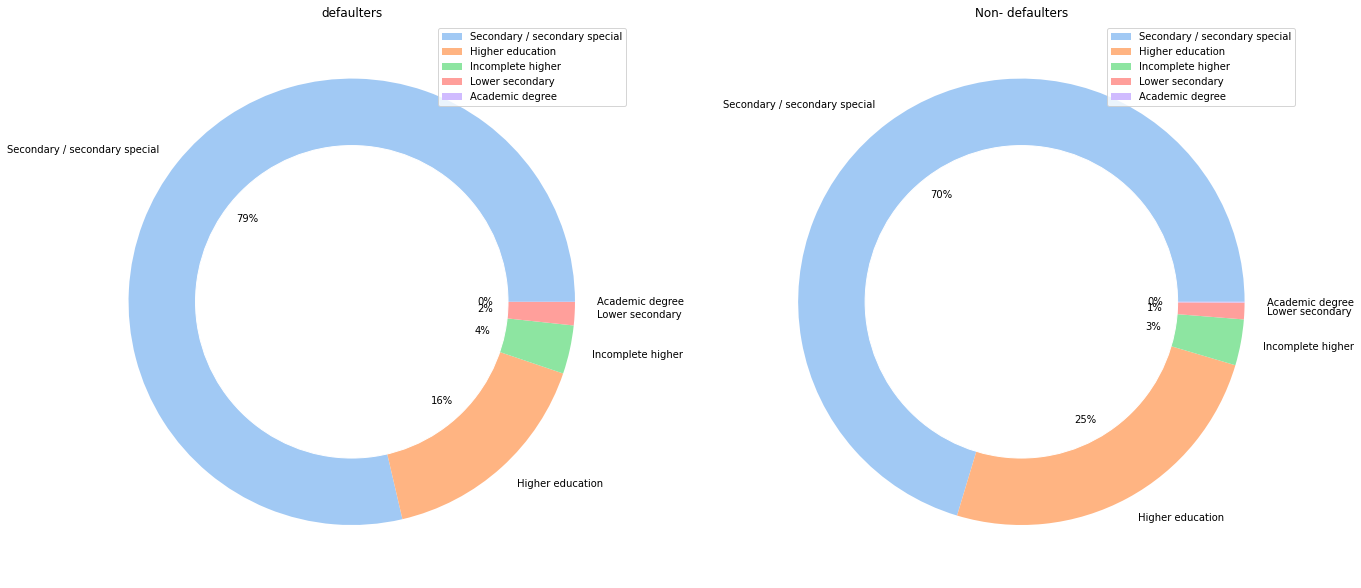

In [84]:
plt.figure(figsize=(22,11))
plt.subplot(1,2,1)
plt.title('defaulters')

#define data
data = default["NAME_EDUCATION_TYPE"].value_counts().values
labels = default["NAME_EDUCATION_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters')
#define data
data = non_default["NAME_EDUCATION_TYPE"].value_counts().values
labels = non_default["NAME_EDUCATION_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

#### Observation
      1. In both Defaulters and non Defaulters majority are secondary/secondary special.
      2. But in Defaulters the no of secondary is more  and  Higher Education client is less  as compare to non defaulters.  
      

### Univariate Analysis (Categorical)
### Target :NAME_FAMILY_STATUS
### Objective: to understand the Family status of the client in  defaulters vs Non- defaulters

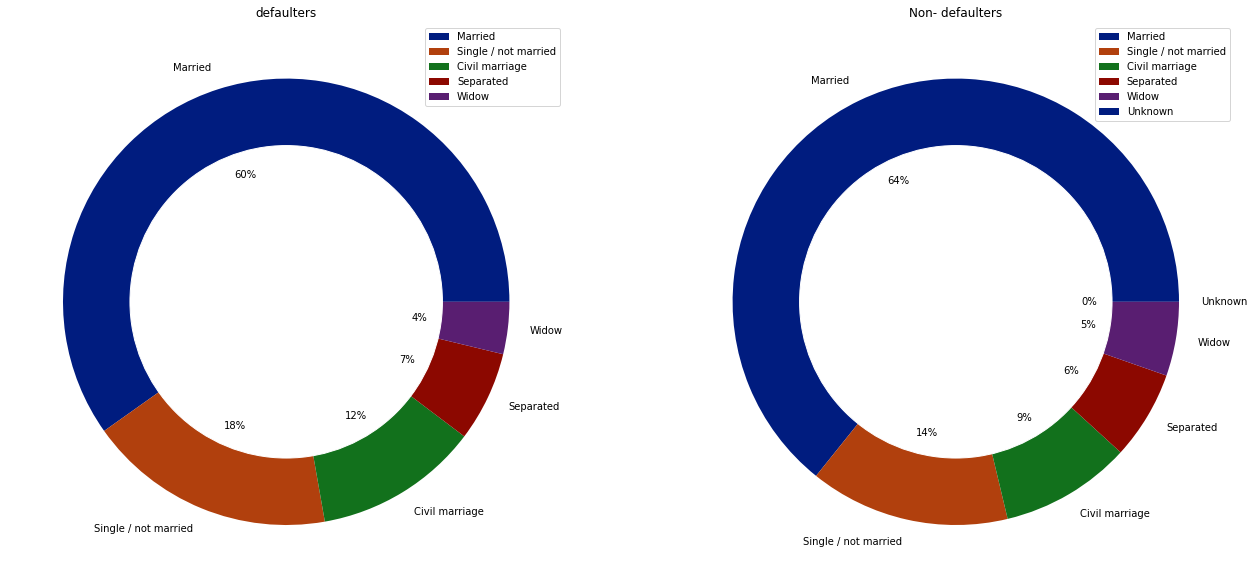

In [85]:
plt.figure(figsize=(22,11))
plt.subplot(1,2,1)
plt.title('defaulters')

#define data
data = default["NAME_FAMILY_STATUS"].value_counts().values
labels = default["NAME_FAMILY_STATUS"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('dark')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters')
#define data
data = non_default["NAME_FAMILY_STATUS"].value_counts().values
labels = non_default["NAME_FAMILY_STATUS"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('dark')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

#### Observation
      1. In both Defaulters and non Defaulters majority are Married people.
      2. But in Defaulters the no of single or not married is more and  married client is less as compare to non defaulters.  
      

### Univariate Analysis (Categorical)
### Target :NAME_HOUSING_TYPE
### Objective: to understand What is the housing situation of the client in  defaulters vs Non- defaulters

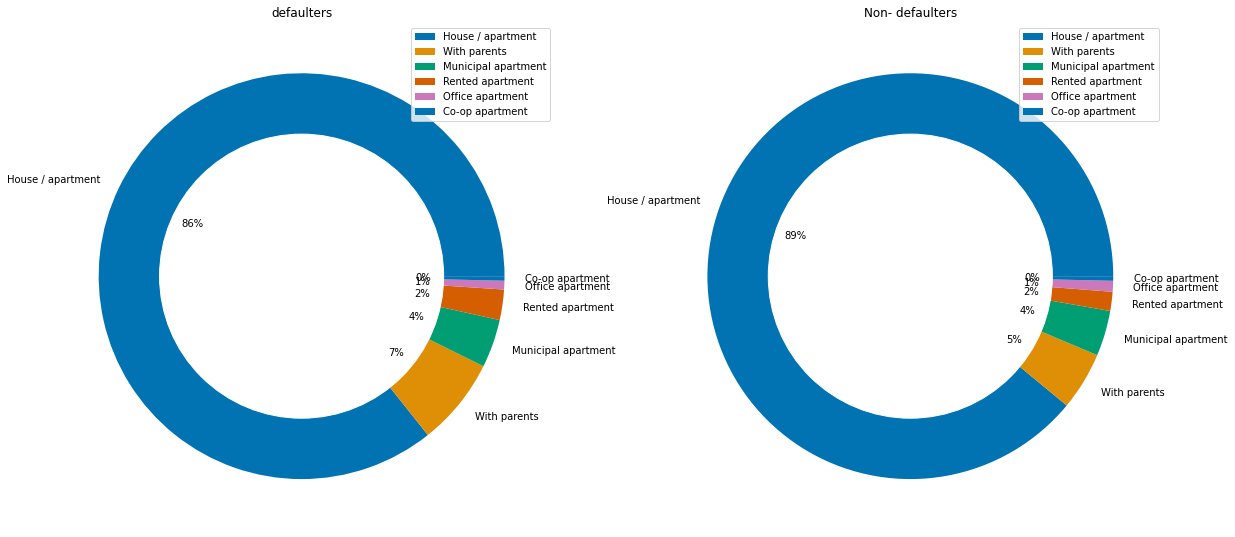

In [86]:
plt.figure(figsize=(20,11))
plt.subplot(1,2,1)
plt.title('defaulters')

#define data
data = default["NAME_HOUSING_TYPE"].value_counts().values
labels = default["NAME_HOUSING_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('colorblind')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters')
#define data
data = non_default["NAME_HOUSING_TYPE"].value_counts().values
labels = non_default["NAME_HOUSING_TYPE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('colorblind')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

#### Observation
      1. In both Defaulters and non Defaulters majority are House/apartment people.

### Univariate Analysis (Categorical)
### Target :ORGANIZATION_TYPE
### Objective: to understand Type of organization where client works in defaulters vs Non- defaulters

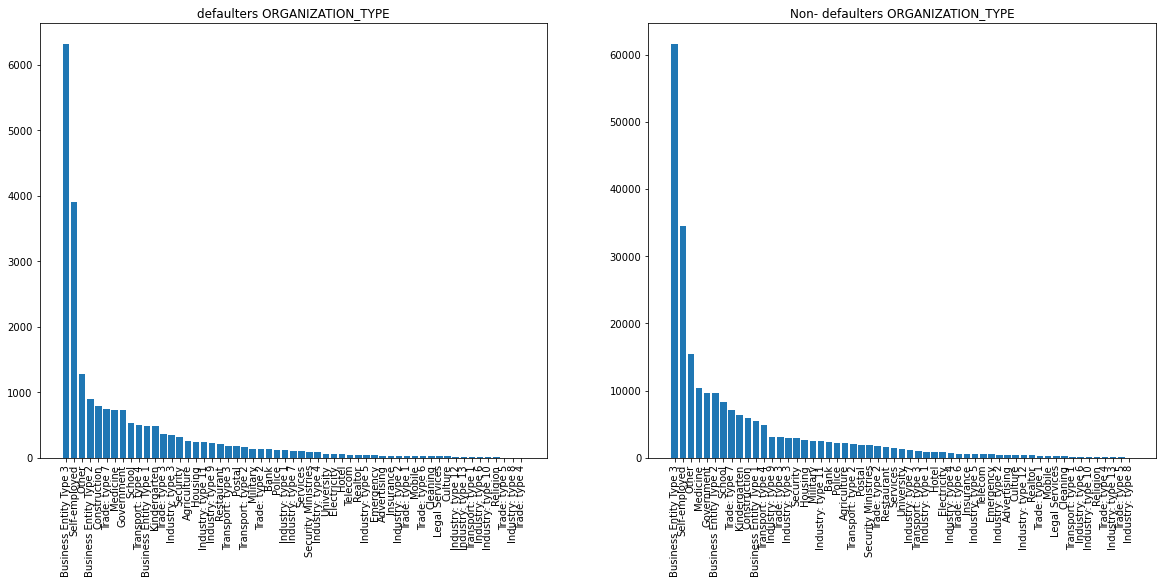

In [87]:

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('defaulters ORGANIZATION_TYPE')

height = default['ORGANIZATION_TYPE'].value_counts().values
x= default['ORGANIZATION_TYPE'].value_counts().index
#create bar graph
plt.bar(x=x,height=height)
plt.xticks( rotation=90)



plt.subplot(1,2,2)
plt.title('Non- defaulters ORGANIZATION_TYPE')

height = non_default['ORGANIZATION_TYPE'].value_counts().values
x= non_default['ORGANIZATION_TYPE'].value_counts().index
#create bar graph
plt.bar(x=x,height=height)
plt.xticks( rotation=90)

plt.show()

#### Observation
      1. In both Defaulters and non Defaulters Buisness Entry type 3 are in higher no.

### Univariate Analysis (Categorical)
### Target :OCCUPATION_TYPE
### Objective: to understand What kind of occupation does the client have in defaulters vs Non- defaulters

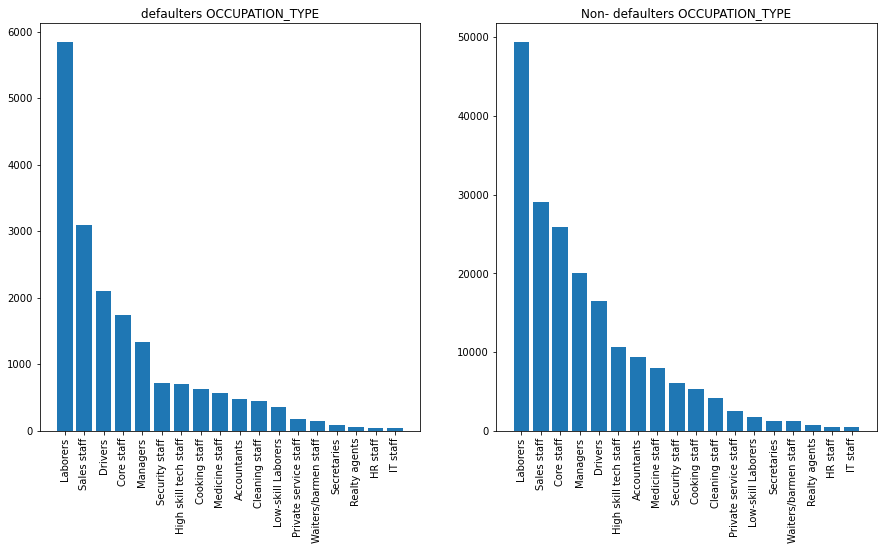

In [88]:
plt.figure(figsize=(15,7.5))
plt.subplot(1,2,1)
plt.title('defaulters OCCUPATION_TYPE')

height = default['OCCUPATION_TYPE'].value_counts().values
x= default['OCCUPATION_TYPE'].value_counts().index
#create bar graph
plt.bar(x=x,height=height)
plt.xticks( rotation=90)




plt.subplot(1,2,2)
plt.title('Non- defaulters OCCUPATION_TYPE')

height = non_default['OCCUPATION_TYPE'].value_counts().values
x= non_default['OCCUPATION_TYPE'].value_counts().index
#create bar graph
plt.bar(x=x,height=height)
plt.xticks( rotation=90)

plt.show()

#### Observation
      1. In both Defaulters and non Defaulters majority are Laborers

### Univariate Analysis (Categorical)
### Target :NAME_TYPE_SUITE
### OBjective: to understand Who was accompanying client when he was applying for the loan in defaulters vs Non- defaulters

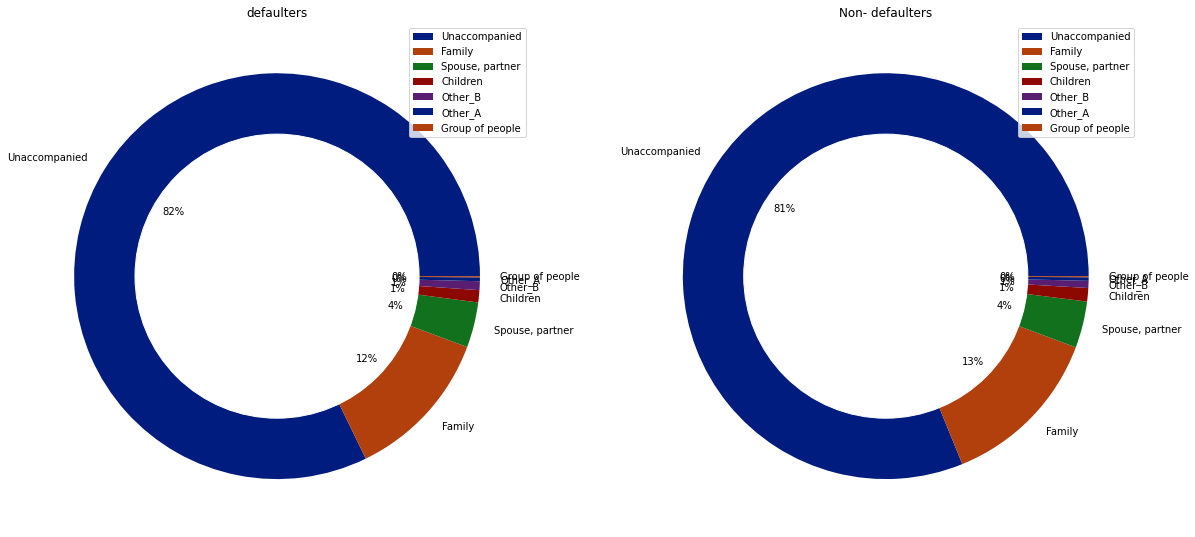

In [89]:
plt.figure(figsize=(20,11))
plt.subplot(1,2,1)
plt.title('defaulters')

#define data
data = default["NAME_TYPE_SUITE"].value_counts().values
labels = default["NAME_TYPE_SUITE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('dark')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)




plt.subplot(1,2,2)
plt.title('Non- defaulters')
#define data
data = non_default["NAME_TYPE_SUITE"].value_counts().values
labels = non_default["NAME_TYPE_SUITE"].value_counts().index

#define Seaborn color palette to use
colors = sns.color_palette('dark')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.legend()

#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.show()

#### Observation
      1. no difference is found.

### Univariate Analysis (Categorical)
### Target :AMT_INCOME_category
### OBjective: to understand  the income range of the client  in defaulters vs Non- defaulters

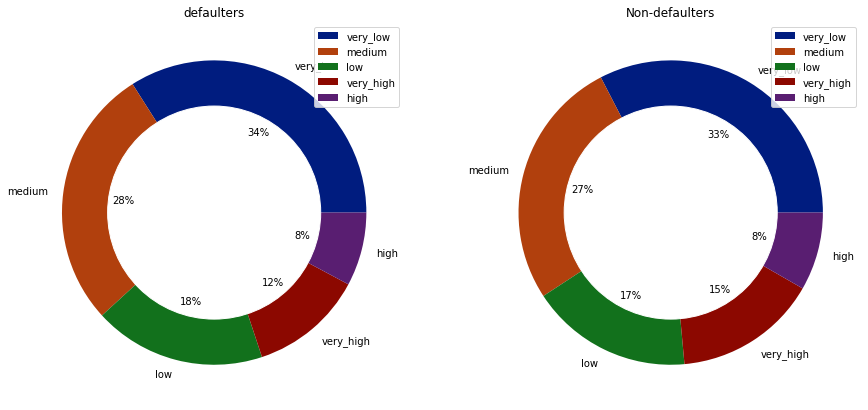

In [90]:
plt.figure(figsize=[15,7.5])
plt.subplot(1,2,1)
plt.title("defaulters")
#define data
data = default["AMT_INCOME_category"].value_counts().values
labels = default["AMT_INCOME_category"].value_counts().index
#define Seaborn color palette to use
color=sns.color_palette("bright")
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend()








plt.subplot(1,2,2)
plt.title("Non-defaulters")
#define data
data=non_default["AMT_INCOME_category"].value_counts().values
labels=non_default["AMT_INCOME_category"].value_counts().index
#define Seaborn color palette to use
color=sns.color_palette("bright")
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend()
plt.show()

#### Observation
      1. In both Defaulters and non Defaulters similar trend can be seen. 
      

### Univariate Analysis (Categorical)
### Target :Age_category
### OBjective: to understand  the Age range of the client  in defaulters vs Non- defaulters

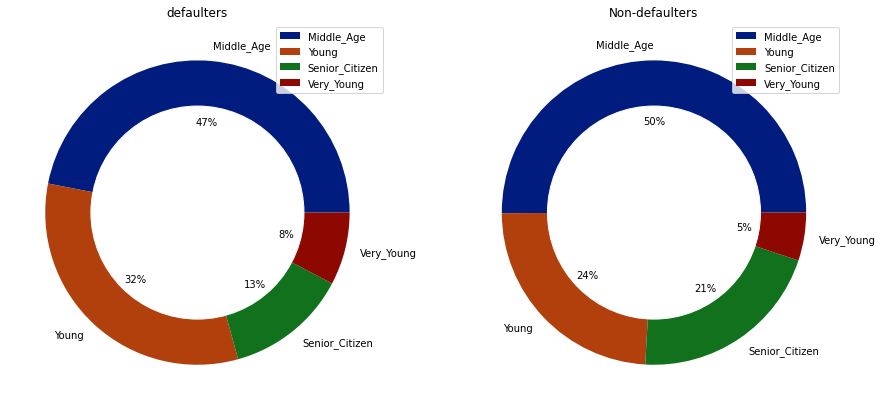

In [91]:
plt.figure(figsize=[15,7.5])
plt.subplot(1,2,1)
plt.title("defaulters")
#define data
data = default["Age_category"].value_counts().values
labels = default["Age_category"].value_counts().index
#define Seaborn color palette to use
color=sns.color_palette("bright")
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend()








plt.subplot(1,2,2)
plt.title("Non-defaulters")
#define data
data=non_default["Age_category"].value_counts().values
labels=non_default["Age_category"].value_counts().index
#define Seaborn color palette to use
color=sns.color_palette("bright")
#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#adding circle to its center to look like a Doughnut
circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)

plt.legend()
plt.show()

#### Observation
      1. In both Defaulters and non Defaulters Middle Age client are more.
      2. In defaulters young client are more as compare to non defaulters and senior Citizen are less.

### Univariate Analysis (Numerical)
### Target :Loan annuity
### OBjective: to understand  the Loan annuity of the client  in defaulters vs Non- defaulters

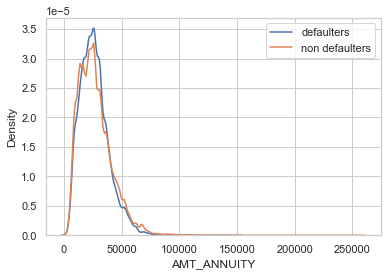

In [92]:
sns.set(style="whitegrid")
sns.distplot(default["AMT_ANNUITY"],hist=False,label="defaulters")
sns.distplot(non_default["AMT_ANNUITY"],hist=False,label="non defaulters")
plt.legend()
plt.show()


#### Observation
      1. In both Defaulters and non Defaulters AMT_ ANNUITY seems to be similar.

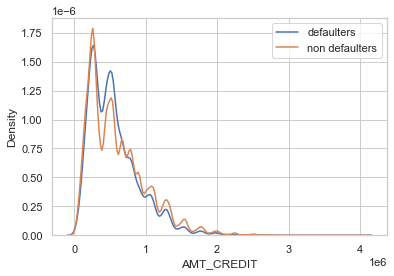

In [93]:
sns.set(style="whitegrid")
sns.distplot(default["AMT_CREDIT"],hist=False,label="defaulters")
sns.distplot(non_default["AMT_CREDIT"],hist=False,label="non defaulters")
plt.legend()
plt.show()

#### Observation
      1. In both Defaulters and non Defaulters AMT_ CREDIT seems to be similar.

### bivariate Analysis 
### Target :AMT_CREDIT vs Age_category 
### Objective: to understand  the AMT_CREDIT vs Age_category of the client  in defaulters vs Non- defaulters

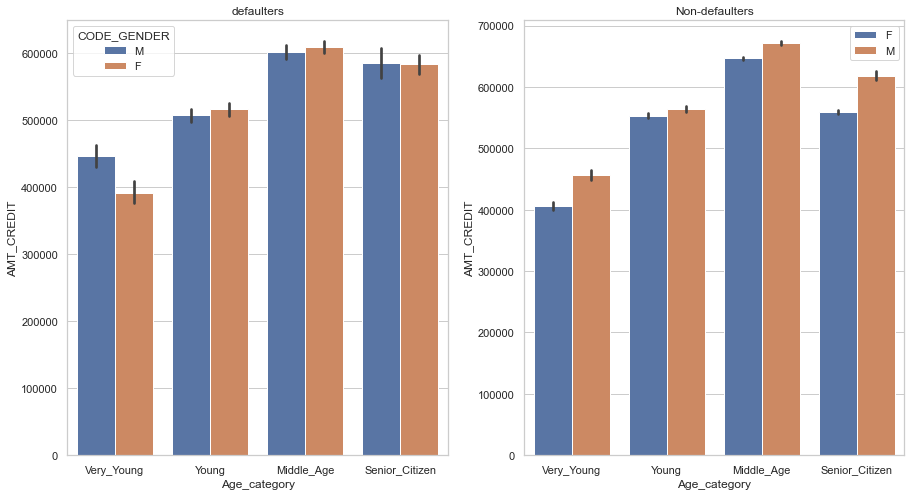

In [94]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.barplot(x="Age_category",y="AMT_CREDIT",hue="CODE_GENDER",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.barplot(x="Age_category",y="AMT_CREDIT",hue="CODE_GENDER",data=non_default)
plt.legend()
plt.show()

#### Observation
      1. In Defaulters male( very young ) are in higher no then in female( very young).

### bivariate Analysis 
### Target :AMT_CREDIT vs CODE_GENDER and Income source
### Objective: to understand  the AMT_CREDIT vs CODE_GENDER and Income source of the client  in defaulters vs Non- defaulters

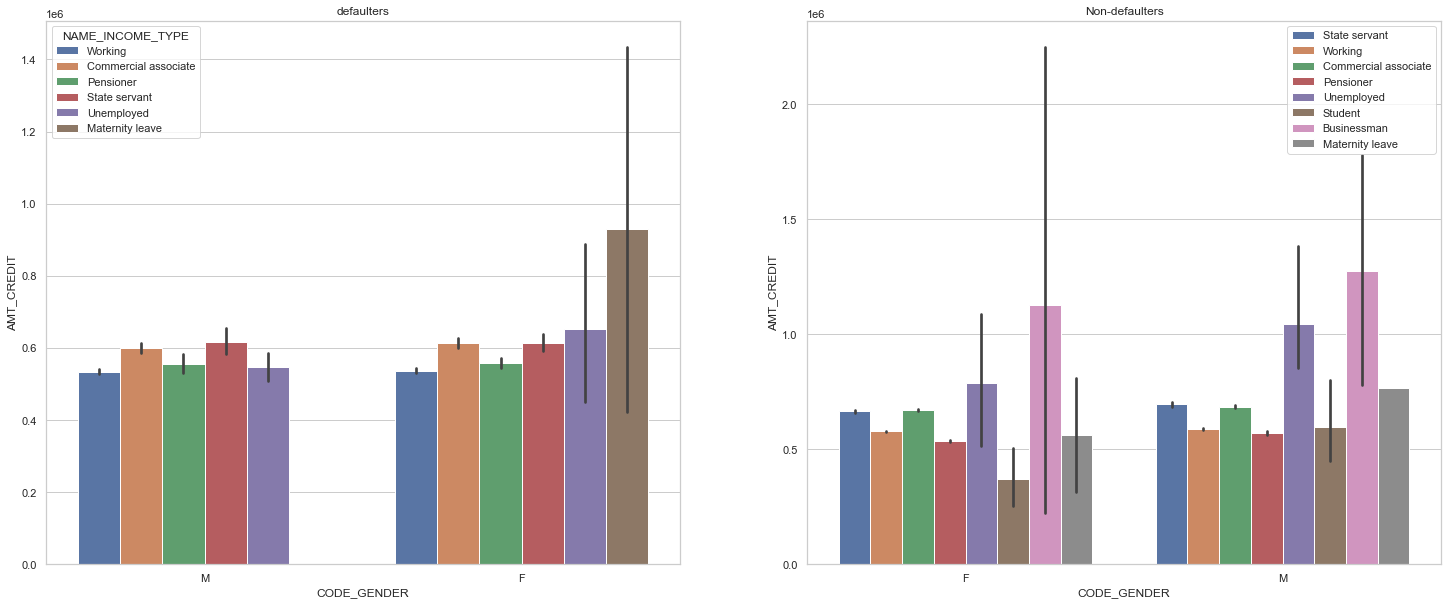

In [95]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.barplot(x="CODE_GENDER",y="AMT_CREDIT",hue="NAME_INCOME_TYPE",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.barplot(x="CODE_GENDER",y="AMT_CREDIT",hue="NAME_INCOME_TYPE",data=non_default)

plt.legend()
plt.show()

#### Observation
      1. In Defaulters Female( Maternity leave ) are having difficulties in paying their loan.

### bivariate Analysis 
### Target :AMT_CREDIT vs CODE_GENDER and Education type
### Objective: to understand  the AMT_CREDIT vs CODE_GENDER and Education Type of the client  in defaulters vs Non- defaulters

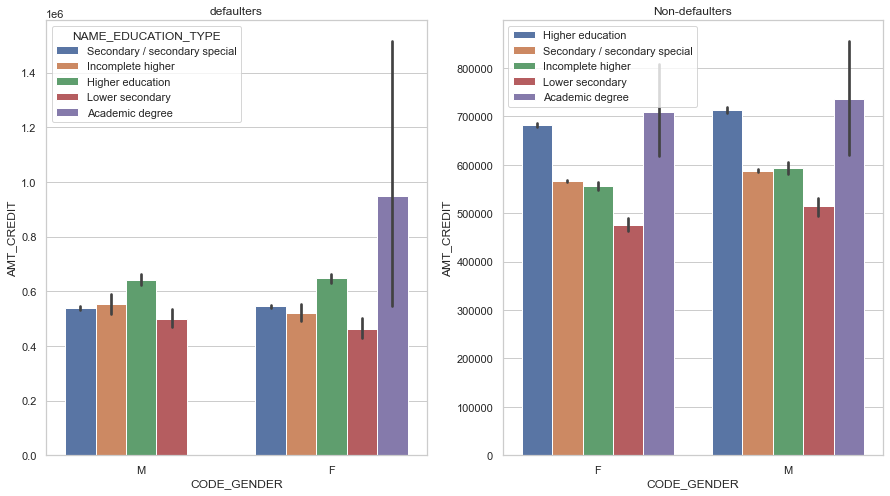

In [96]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.barplot(x="CODE_GENDER",y="AMT_CREDIT",hue="NAME_EDUCATION_TYPE",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.barplot(x="CODE_GENDER",y="AMT_CREDIT",hue="NAME_EDUCATION_TYPE",data=non_default)
plt.legend()
plt.show()

#### Observation
      1. In Defaulters male there are no academic degree client (they dont have any problems in paying their loan)
       
   

### bivariate Analysis 
### Target :AMT_CREDIT vs CODE_GENDER and Family status
### Objective: to understand  the AMT_CREDIT vs CODE_GENDER and Family status of the client  in defaulters vs Non- defaulters

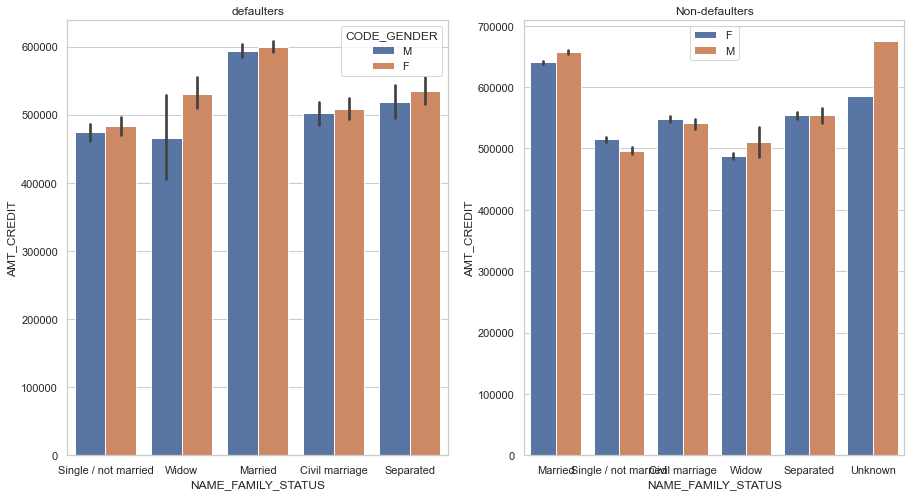

In [97]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.barplot(x="NAME_FAMILY_STATUS",y="AMT_CREDIT",hue="CODE_GENDER",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.barplot(x="NAME_FAMILY_STATUS",y="AMT_CREDIT",hue="CODE_GENDER",data=non_default)
plt.legend()
plt.show()

#### Observation
      1. In Defaulters both male and female those are  married  have problems in paying their loan.
      2. In defaulters female(widow) have problems in paying their loan as compare to male (widow).
      
   

### bivariate Analysis 
### Target :Source of  Income vs Total Income and Family status
### Objective: to understand  the Source of  Income vs Total Income and Family status of the client  in defaulters vs Non- defaulters

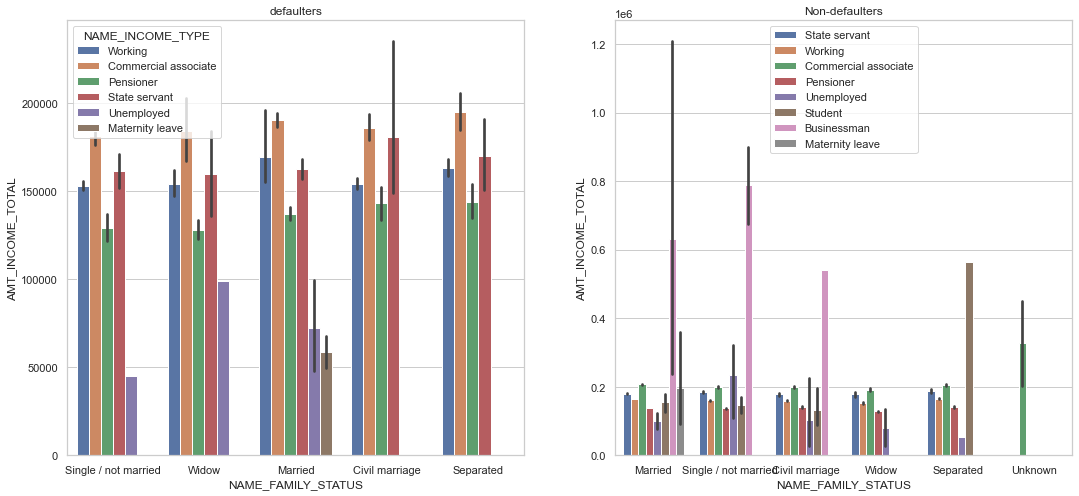

In [98]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.barplot(x="NAME_FAMILY_STATUS",y="AMT_INCOME_TOTAL",hue="NAME_INCOME_TYPE",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.barplot(x="NAME_FAMILY_STATUS",y="AMT_INCOME_TOTAL",hue="NAME_INCOME_TYPE",data=non_default)
plt.legend()
plt.show()

#### Observation
      1. In Defaulters Separated(Commercial Associate)  are highest salaried client (it means less payment difficulties)
      2. In defaulters married(maternity leaves) have problems in paying their loan.
      3. In defaulters  not married(unemployed) have problems in paying their loan.
      
   

## top 10 correlation matrix

##### 1. for Defaulters

In [99]:
corr_def=default.select_dtypes('number') ### creating a data frame which contains only numeric dtata
corr_mat_def = corr_def.corr(method='pearson')  #### making correlation matrix with a method pearson
sorted_mat_def = corr_mat_def.unstack().sort_values(ascending=False).drop_duplicates()  #### for top 10 correlation matrix we need to sort and  make 1-d series and droping duplicates for simplicity
print(sorted_mat_def[2:12])  ### age and days of birth are the same so excluding them

AMT_CREDIT         AMT_GOODS_PRICE     0.98278
CNT_FAM_MEMBERS    CNT_CHILDREN        0.88548
AMT_GOODS_PRICE    AMT_ANNUITY         0.75230
AMT_CREDIT         AMT_ANNUITY         0.75219
Age                DAYS_EMPLOYED       0.58244
DAYS_BIRTH         DAYS_EMPLOYED       0.58219
Age                DAYS_REGISTRATION   0.28912
DAYS_REGISTRATION  DAYS_BIRTH          0.28911
DAYS_BIRTH         DAYS_ID_PUBLISH     0.25286
DAYS_ID_PUBLISH    Age                 0.25226
dtype: float64


##### 2. for Non-Defaulters

In [100]:
corr_ndef=non_default.select_dtypes('number') ### creating a data frame which contains only numeric dtata
corr_mat_ndef = corr_ndef.corr(method='pearson')  #### making correlation matrix with a method pearson
sorted_mat_ndef = corr_mat_ndef.unstack().sort_values(ascending=False).drop_duplicates()  #### for top 10 correlation matrix we need to sort and  make 1-d series and droping duplicates for simplicity
print(sorted_mat_ndef[2:12]) ### age and days of birth are the same so excluding them

AMT_CREDIT        AMT_GOODS_PRICE     0.98702
CNT_CHILDREN      CNT_FAM_MEMBERS     0.87857
AMT_ANNUITY       AMT_GOODS_PRICE     0.77642
                  AMT_CREDIT          0.77130
DAYS_EMPLOYED     DAYS_BIRTH          0.62611
Age               DAYS_EMPLOYED       0.62603
AMT_INCOME_TOTAL  AMT_ANNUITY         0.41895
                  AMT_GOODS_PRICE     0.34943
AMT_CREDIT        AMT_INCOME_TOTAL    0.34280
DAYS_BIRTH        DAYS_REGISTRATION   0.33315
dtype: float64


### bivariate Analysis (numerical vs numerical)
### Target :AMT_ANNUITY vs AMT_CREDIT
### Objective: to understand  the correlation  in defaulters vs Non- defaulters

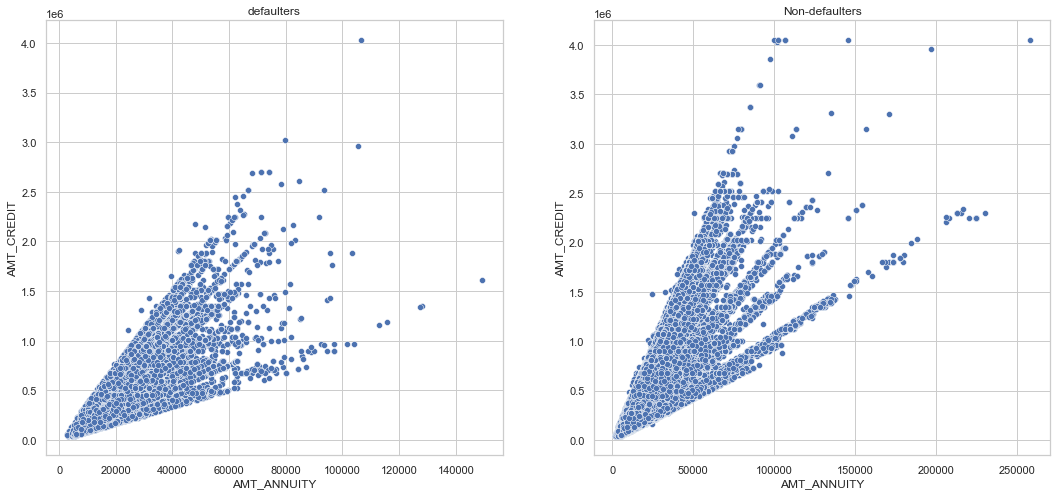

In [101]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.scatterplot(x="AMT_ANNUITY",y="AMT_CREDIT",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.scatterplot(x="AMT_ANNUITY",y="AMT_CREDIT",data=non_default)

plt.show()

#### Observation
        1. As we can see AMT_ANNUITY and AMT_CREDIT are positive correlated in both the cases defaulters and non-defaulters.
        2. so as loan annuity increases the amount of credit also increases.

### bivariate Analysis (numerical vs numerical)
### Target :AMT_GOODS_PRICE vs AMT_CREDIT
### Objective: to understand  the correlation  in defaulters vs Non- defaulters

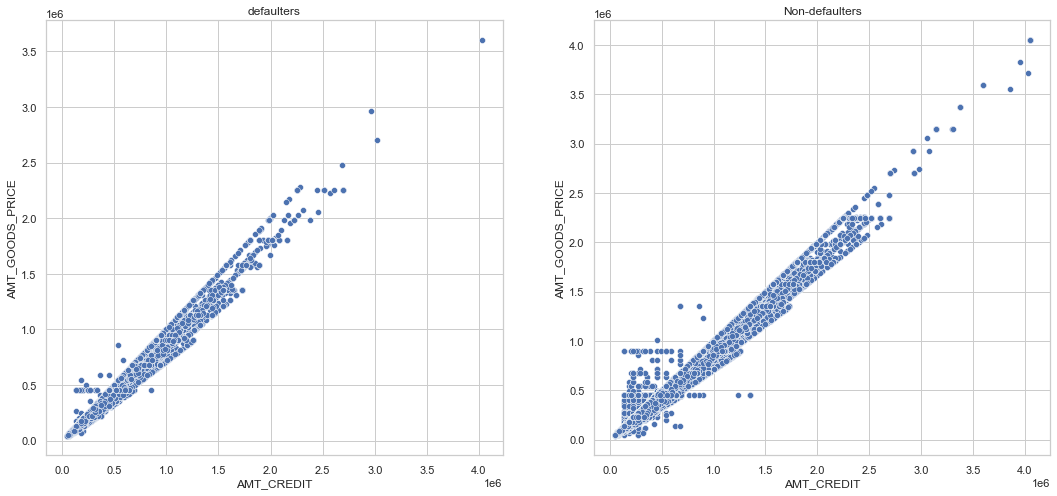

In [102]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.title('defaulters')
sns.scatterplot(x="AMT_CREDIT",y="AMT_GOODS_PRICE",data=default)


plt.subplot(1,2,2)
plt.title('Non-defaulters')
sns.scatterplot(x="AMT_CREDIT",y="AMT_GOODS_PRICE",data=non_default)


plt.show()

#### Observation
      1.As we can see AMT_GOOD_PRICE and AMT_CREDIT are positive correlated in both the cases defaulters and non-defaulters.
      2.so as goods price increases the amount of credit also increases.

### Multivariate Analysis

In [103]:
# creating a pivot table 
df = pd.pivot_table(data = app_data, index = 'NAME_EDUCATION_TYPE', columns = 'NAME_FAMILY_STATUS', values = 'TARGET', aggfunc='mean')

In [104]:
df.head() # there is an unknown coloumn 

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Unknown,Widow
NAME_EDUCATION_TYPE,,,,,,
Academic degree,0.00000,0.01887,0.00000,0.03448,NaN,0.00000
Higher education,0.06620,0.04965,0.05735,0.06205,0.00000,0.04809
Incomplete higher,0.09248,0.07914,0.08664,0.09414,NaN,0.06358
Lower secondary,0.13592,0.10296,0.13825,0.13299,0.00000,0.06796
Secondary / secondary special,0.10832,0.08414,0.08990,0.11324,NaN,0.05967


In [105]:
df.drop('Unknown', axis = 1, inplace = True) #droping unknown  coloumn

In [106]:
df.head()

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_EDUCATION_TYPE,,,,,
Academic degree,0.00000,0.01887,0.00000,0.03448,0.00000
Higher education,0.06620,0.04965,0.05735,0.06205,0.04809
Incomplete higher,0.09248,0.07914,0.08664,0.09414,0.06358
Lower secondary,0.13592,0.10296,0.13825,0.13299,0.06796
Secondary / secondary special,0.10832,0.08414,0.08990,0.11324,0.05967


In [107]:
app_data.TARGET.value_counts(normalize=True)[1] ### center value for the heat map

0.08072881945686496

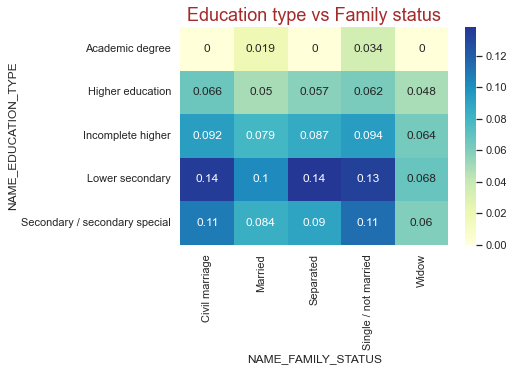

In [108]:
plt.title('Education type vs Family status', fontdict={'fontsize':18, 'color':'Brown'})
sns.heatmap(df, annot = True,center=0.08, cmap="YlGnBu")
plt.show()

#### As we set the  center mean of the target variable (if the correlation is near to 1 then chances to become defaulter is more)
     1. chances of becoming defaulter is more of ( seperated with lower secondary and civil marriage with lower secondary)

In [109]:
# creating pivot table for heat map
df1 = pd.pivot_table(data = app_data, index = 'OCCUPATION_TYPE', columns = 'Age_category', values = 'TARGET', aggfunc='mean')

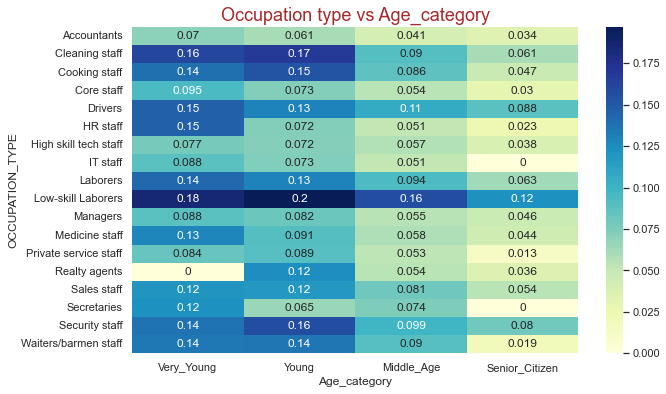

In [110]:
plt.figure(figsize = [10, 6])
plt.title('Occupation type vs Age_category', fontdict={'fontsize':18, 'color':'Brown'})
sns.heatmap(df1, cmap = 'YlGnBu', annot = True)
plt.show()

#### 
     1.AS we can see the low skill laborers correlation![image.png](attachment:image.png) is on higher side chances of becoming defaulters is high for them

### Loading previous application 

In [111]:
pre_data=pd.read_csv("previous_application.csv")

In [112]:
pre_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43000,17145.00000,17145.00000,0.00000,17145.00000,SATURDAY,15,Y,1,0.00000,0.18283,0.86734,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00000,middle,POS mobile with interest,365243.00000,-42.00000,300.00000,-42.00000,-37.00000,0.00000
1,2802425,108129,Cash loans,25188.61500,607500.00000,679671.00000,NaN,607500.00000,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00000,low_action,Cash X-Sell: low,365243.00000,-134.00000,916.00000,365243.00000,365243.00000,1.00000
2,2523466,122040,Cash loans,15060.73500,112500.00000,136444.50000,NaN,112500.00000,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,high,Cash X-Sell: high,365243.00000,-271.00000,59.00000,365243.00000,365243.00000,1.00000
3,2819243,176158,Cash loans,47041.33500,450000.00000,470790.00000,NaN,450000.00000,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00000,middle,Cash X-Sell: middle,365243.00000,-482.00000,-152.00000,-182.00000,-177.00000,1.00000
4,1784265,202054,Cash loans,31924.39500,337500.00000,404055.00000,NaN,337500.00000,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00000,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
pre_data.shape

(1670214, 37)

In [114]:
pre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [115]:
null_percent_pre=pre_data.isnull().mean().sort_values(ascending=False)*100 # checking null percentage

In [116]:
null_percent_pre

RATE_INTEREST_PRIVILEGED      99.64370
RATE_INTEREST_PRIMARY         99.64370
AMT_DOWN_PAYMENT              53.63648
RATE_DOWN_PAYMENT             53.63648
NAME_TYPE_SUITE               49.11975
NFLAG_INSURED_ON_APPROVAL     40.29813
DAYS_TERMINATION              40.29813
DAYS_LAST_DUE                 40.29813
DAYS_LAST_DUE_1ST_VERSION     40.29813
DAYS_FIRST_DUE                40.29813
DAYS_FIRST_DRAWING            40.29813
AMT_GOODS_PRICE               23.08177
AMT_ANNUITY                   22.28667
CNT_PAYMENT                   22.28637
PRODUCT_COMBINATION            0.02072
AMT_CREDIT                     0.00006
NAME_YIELD_GROUP               0.00000
NAME_PORTFOLIO                 0.00000
NAME_SELLER_INDUSTRY           0.00000
SELLERPLACE_AREA               0.00000
CHANNEL_TYPE                   0.00000
NAME_PRODUCT_TYPE              0.00000
SK_ID_PREV                     0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_CLIENT_TYPE               0.00000
CODE_REJECT_REASON       

In [117]:
temp_pre=null_percent_pre.reset_index()

In [118]:
temp_pre.head()

,index,0
0,RATE_INTEREST_PRIVILEGED,99.64370
1,RATE_INTEREST_PRIMARY,99.64370
2,AMT_DOWN_PAYMENT,53.63648
3,RATE_DOWN_PAYMENT,53.63648
4,NAME_TYPE_SUITE,49.11975


In [119]:
temp_pre=temp_pre.rename(columns={"index":"Column",0:"Missing_percentage"}).sort_values(by="Missing_percentage",ascending=False) # renaming columns name

In [120]:
drop_cols_pre=list(temp_pre[temp_pre["Missing_percentage"]>40]["Column"])

In [121]:
pre_data.drop(drop_cols_pre,axis=1,inplace=True)

In [122]:
pre_data.shape

(1670214, 26)

### Merging the data

In [123]:
merge_data_def=pd.merge(left =default, right = pre_data, how = 'left', left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR')

In [124]:
merge_data_def.shape

(123340, 55)

In [125]:
merge_data_def.NAME_CONTRACT_STATUS.value_counts()

Approved        67243
Refused         29438
Canceled        23800
Unused offer     1879
Name: NAME_CONTRACT_STATUS, dtype: int64

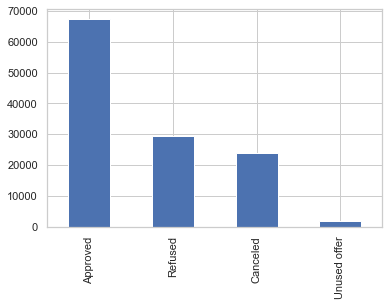

In [126]:
merge_data_def.NAME_CONTRACT_STATUS.value_counts().plot.bar()
plt.show()

#### Observation
      1.most of the client with previously approved loans (67243) having problems in paying their loan.

In [127]:
import jovian

In [128]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Committed successfully! https://jovian.ai/dkm1996-dm/eda-casestudy-dheeraj-mishra


'https://jovian.ai/dkm1996-dm/eda-casestudy-dheeraj-mishra'